In [23]:
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
print(tf.__version__)

2.12.0


In [24]:
random_seed = 42
n_time_steps = 5 #taking 3 seconds
n_features = 132
step = 2 #taking 1.5 seconds
n_classes = 2
n_epochs = 10
batch_size = 32
learning_rate = 0.00025
l2_loss = 0.0015

In [25]:
import pandas as pd
import os

# Specify the folder where your CSV files are located
folder_path = "C:/aryaaa/arya's model(2)/yoga poses csv"

# Specify the names of the CSV files you want to access
file_names_to_access = ["Tree_normal.csv", "Tree pose.csv"]

# Initialize an empty list to hold individual DataFrames
data_frames = []

# Loop through the specified file names and read and append their data to the data_frames list
for file_name in file_names_to_access:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data_frames.append(data)

# Combine the individual DataFrames into one DataFrame
df = pd.concat(data_frames).reset_index(drop=True)

# Check the shape of the combined_data DataFrame
print(df.shape)


(27646, 133)


In [26]:
df.head()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,tree_noprmal,0.014236,-0.644286,-0.310590,0.999987,0.021616,-0.682103,-0.296279,0.999955,0.021851,...,0.289941,0.823029,0.132185,0.830148,0.199491,0.961670,-0.076404,0.803058,0.172519,0.948155
1,tree_noprmal,0.014710,-0.644387,-0.308900,0.999987,0.022002,-0.682247,-0.293933,0.999955,0.022240,...,0.287583,0.818622,0.131050,0.828614,0.198001,0.959114,-0.076616,0.799511,0.171601,0.944206
2,tree_noprmal,0.014826,-0.644193,-0.308910,0.999987,0.022123,-0.682092,-0.293921,0.999956,0.022364,...,0.285998,0.814368,0.129371,0.828403,0.194270,0.956949,-0.076599,0.798669,0.170353,0.940811
3,tree_noprmal,0.014901,-0.643827,-0.308926,0.999988,0.022224,-0.681764,-0.293923,0.999956,0.022468,...,0.281912,0.810086,0.126994,0.828437,0.187956,0.954842,-0.076399,0.798344,0.165918,0.937483
4,tree_noprmal,0.014981,-0.642392,-0.313221,0.999988,0.022374,-0.680368,-0.298003,0.999957,0.022621,...,0.278561,0.806620,0.126947,0.828445,0.185388,0.953230,-0.075233,0.798485,0.161897,0.935224


In [27]:
df.tail()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
27641,tree_pose,0.021194,-0.628878,-0.207728,0.999951,0.028712,-0.666841,-0.192641,0.999927,0.029349,...,0.142205,0.601484,0.021340,0.829230,0.015003,0.957288,0.047964,0.307085,0.124831,0.550310
27642,tree_pose,0.021564,-0.628832,-0.206645,0.999955,0.029250,-0.666792,-0.191629,0.999932,0.029889,...,0.142324,0.605393,0.021499,0.828002,0.013103,0.958219,0.048971,0.307014,0.125340,0.554692
27643,tree_pose,0.021935,-0.628803,-0.205894,0.999958,0.029746,-0.666763,-0.190897,0.999936,0.030387,...,0.142366,0.608250,0.022109,0.827073,0.012305,0.959060,0.050190,0.306681,0.125564,0.558264
27644,tree_pose,0.022402,-0.628728,-0.205666,0.999961,0.030365,-0.666675,-0.190647,0.999941,0.031011,...,0.145985,0.611447,0.022299,0.824889,0.012008,0.959751,0.050273,0.306882,0.130375,0.561701
27645,tree_pose,0.023353,-0.628644,-0.205385,0.999964,0.031489,-0.666580,-0.190336,0.999945,0.032141,...,0.148365,0.614537,0.024587,0.821164,0.011403,0.960342,0.051323,0.307231,0.133440,0.565215


In [28]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and "category" is your target column
X = df.drop('pose_folder', axis=1)
y = df['pose_folder']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Create a DataFrame with the rebalanced data
balanced_df = pd.concat([pd.DataFrame(y_sm, columns=['pose_folder']), pd.DataFrame(X_sm)], axis=1)
balanced_df

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,tree_noprmal,0.014236,-0.644286,-0.310590,0.999987,0.021616,-0.682103,-0.296279,0.999955,0.021851,...,0.289941,0.823029,0.132185,0.830148,0.199491,0.961670,-0.076404,0.803058,0.172519,0.948155
1,tree_noprmal,0.014710,-0.644387,-0.308900,0.999987,0.022002,-0.682247,-0.293933,0.999955,0.022240,...,0.287583,0.818622,0.131050,0.828614,0.198001,0.959114,-0.076616,0.799511,0.171601,0.944206
2,tree_noprmal,0.014826,-0.644193,-0.308910,0.999987,0.022123,-0.682092,-0.293921,0.999956,0.022364,...,0.285998,0.814368,0.129371,0.828403,0.194270,0.956949,-0.076599,0.798669,0.170353,0.940811
3,tree_noprmal,0.014901,-0.643827,-0.308926,0.999988,0.022224,-0.681764,-0.293923,0.999956,0.022468,...,0.281912,0.810086,0.126994,0.828437,0.187956,0.954842,-0.076399,0.798344,0.165918,0.937483
4,tree_noprmal,0.014981,-0.642392,-0.313221,0.999988,0.022374,-0.680368,-0.298003,0.999957,0.022621,...,0.278561,0.806620,0.126947,0.828445,0.185388,0.953230,-0.075233,0.798485,0.161897,0.935224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32703,tree_pose,-0.163465,-0.448952,-0.487956,0.999993,-0.135676,-0.480809,-0.493776,0.999993,-0.135199,...,0.230517,0.243878,-0.258146,0.196182,0.173153,0.488433,-0.234263,0.187308,0.265721,0.204983
32704,tree_pose,0.005456,-0.671575,-0.177099,0.998537,0.007176,-0.705919,-0.157097,0.998264,0.007495,...,0.143866,0.585847,-0.017892,0.845082,0.028540,0.940313,-0.028101,0.314844,0.128092,0.543565
32705,tree_pose,0.017851,-0.667008,-0.162762,0.998226,0.021844,-0.699906,-0.146763,0.998791,0.022113,...,0.279553,0.193369,0.132988,0.760001,0.028237,0.593455,-0.016888,0.347331,0.274882,0.095409
32706,tree_pose,0.058568,-0.603836,-0.170770,0.999908,0.065757,-0.643175,-0.154252,0.999866,0.066352,...,-0.008193,0.471410,0.043025,0.892028,-0.058527,0.968477,0.039320,0.230220,-0.017817,0.495815


In [30]:
import numpy as np
import pandas as pd

# Initialize lists to store segments and labels
segments = []
labels = []

# Loop through the data with a specified step
for i in range(0, balanced_df.shape[0], step):
    mylist = []
    label = None  # Initialize label as None

    if i + n_time_steps < balanced_df.shape[0]:
        for j in range(i, i + n_time_steps):
            mylist.append(balanced_df.iloc[j, 1:133].values)  # Assuming you have 132 feature columns

        # Check the label for the segment
        if 'tree_pose' in balanced_df['pose_folder'].iloc[i:i + n_time_steps].values:
            label = 1  # Set label to 1 if 'tree pose' is present in this segment
        else:
            label = 0  # Set label to 0 if 'tree pose' is not present

        segments.append(mylist)
        labels.append(label)

# Convert segments and labels to NumPy arrays
reshaped_segments = np.array(segments, dtype=np.float32)
labels_binary = np.array(labels, dtype=np.float32)


In [31]:
labels_binary

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [32]:
# Add attention layer to the deep learning network
class attention_layer(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.backend.softmax(e)
        # Reshape to tensorFlow format
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = tf.keras.backend.sum(context, axis=1)
        return context

In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels_binary, test_size=0.2, random_state=random_seed)

n_classes = 2

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [34]:
X_train.shape

(13081, 5, 132)

In [35]:
from kerastuner.tuners import Hyperband
# Define a hypermodel using a function
def build_hypermodel(hp):
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units', min_value=64, max_value=256, step=32), return_sequences=True)(inputs)
    x = tf.keras.layers.LeakyReLU(alpha=0.5)(x)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    attention = attention_layer()(x)
    attention = tf.keras.layers.Reshape((-1, 1))(attention)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units', min_value=64, max_value=256, step=32), 5, strides=2, activation='relu')(attention)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units_2', min_value=32, max_value=128, step=32), 3, strides=1, activation='relu')(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1))(x)
    output = tf.keras.layers.Dense(2, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs, output)

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        metrics=["accuracy"],
    )
    return model

# Initialize the tuner
tuner = Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=n_epochs,
    factor=3,
    directory='keras_tuner_dir',
    project_name='my_hypermodel'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=n_epochs, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Reloading Tuner from keras_tuner_dir\my_hypermodel\tuner0.json


In [36]:
# Build and compile the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)
final_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
    metrics=["accuracy"],
)

# Train the final model
history = final_model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.20, batch_size=batch_size, verbose=1)

# Evaluate the final model
loss, accuracy = final_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

Epoch 1/10
327/327 [==============================] - 29s 37ms/step - loss: 0.1352 - accuracy: 0.9472 - val_loss: 0.0965 - val_accuracy: 0.9637
Epoch 2/10
327/327 [==============================] - 8s 26ms/step - loss: 0.0802 - accuracy: 0.9710 - val_loss: 0.1142 - val_accuracy: 0.9580
Epoch 3/10
327/327 [==============================] - 8s 25ms/step - loss: 0.0740 - accuracy: 0.9740 - val_loss: 0.0739 - val_accuracy: 0.9690
Epoch 4/10
327/327 [==============================] - 8s 25ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 0.0663 - val_accuracy: 0.9775
Epoch 5/10
327/327 [==============================] - 8s 26ms/step - loss: 0.0597 - accuracy: 0.9767 - val_loss: 0.0724 - val_accuracy: 0.9771
Epoch 6/10
327/327 [==============================] - 8s 25ms/step - loss: 0.0628 - accuracy: 0.9766 - val_loss: 0.0641 - val_accuracy: 0.9782
Epoch 7/10
327/327 [==============================] - 8s 24ms/step - loss: 0.0520 - accuracy: 0.9820 - val_loss: 0.0604 - val_accuracy: 0.977

In [37]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 132)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 64)             50432     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 5, 128)            98816     
                                                                 
 attention_layer_1 (attentio  (None, 128)              133       
 n_layer)                                                        
                                                                 
 reshape_1 (Reshape)         (None, 128, 1)            0         
                                                           

In [38]:
# from tensorflow.keras.utils import plot_model

# # Build the hypermodel
# model = build_hypermodel(best_hps)

# # Visualize the model architecture
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=2000)



In [39]:
# pip install pygraphviz

In [40]:
# import pygraphviz as pgv
# from PIL import Image
# import matplotlib.pyplot as plt

# # Convert the PNG to a format readable by pygraphviz
# img = Image.open('model_architecture.png')
# img.save('model_architecture.png')

# # Create a block diagram using pygraphviz
# graph = pgv.AGraph(directed=True)

# # Read the model architecture from the saved image
# graph.add_path(['Input Layer', 'LSTM', 'LeakyReLU', 'LSTM', 'Attention', 'Reshape', 'Conv1D', 'MaxPooling1D', 'Conv1D', 'MaxPooling1D', 'Flatten', 'Dense', 'Dropout', 'Dense', 'Output Layer'])

# # Optional: Customize the appearance of the nodes and edges
# graph.node_attr['shape'] = 'box'
# graph.edge_attr['color'] = 'blue'

# # Save the block diagram as an image
# graph.draw('model_block_diagram.png', format='png', prog='dot')

# # Display the block diagram using matplotlib
# plt.imshow(plt.imread('model_block_diagram.png'))
# plt.axis('off')
# plt.show()


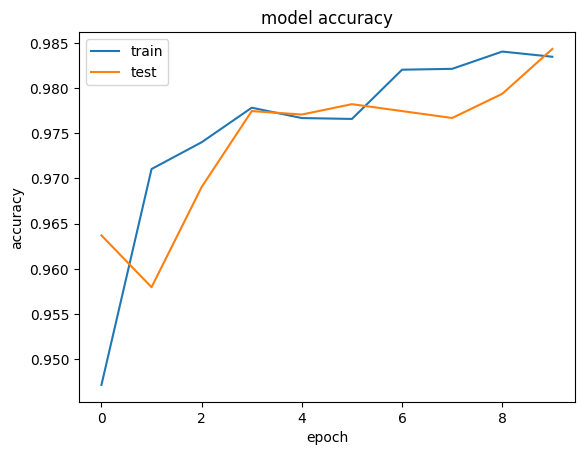

In [41]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

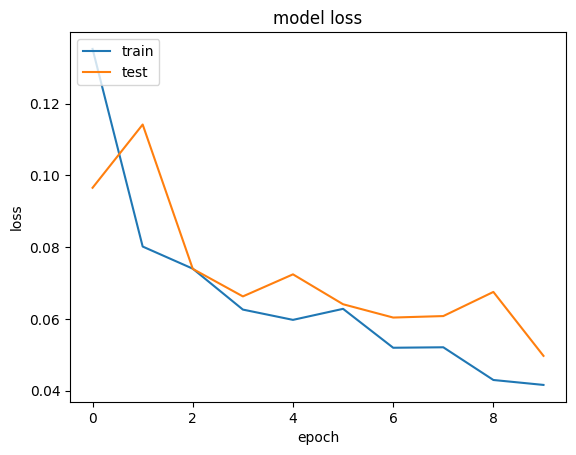

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
final_model.save("C:/aryaaa/arya's model(2)/MTP MODEL/Tree Pose model")

INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Tree Pose model\assets


INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Tree Pose model\assets


103/103 [==============================] - 2s 7ms/step
True Positives (TP): 1615
True Negatives (TN): 1602
False Positives (FP): 19
False Negatives (FN): 35
AUC: 0.9990189370571851


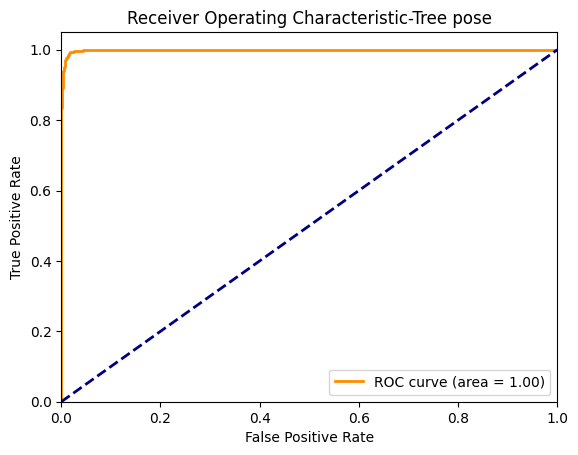

In [44]:
import sklearn

# Evaluate the final model
y_pred = final_model.predict(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test[:, 1], y_pred[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions
confusion_matrix = sklearn.metrics.confusion_matrix(y_test[:, 1], y_pred_binary[:, 1])
tn, fp, fn, tp = confusion_matrix.ravel()

# Print the TP, TN, FP, FN, and AUC
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-Tree pose')
plt.legend(loc="lower right")
plt.show()


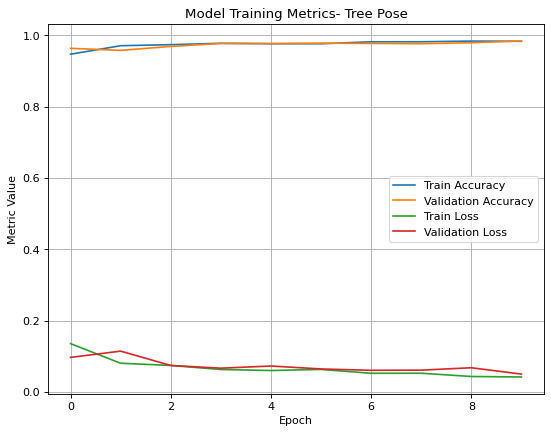

In [45]:
plt.figure(figsize=(8, 6),dpi=80)

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')


plt.title('Model Training Metrics- Tree Pose')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


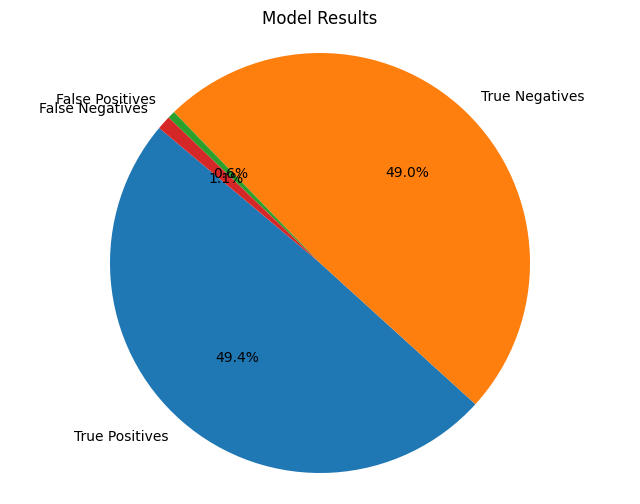

In [46]:
import matplotlib.pyplot as plt

# Calculate the counts for TP, TN, FP, FN
counts = [tp, tn, fp, fn]
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Model Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


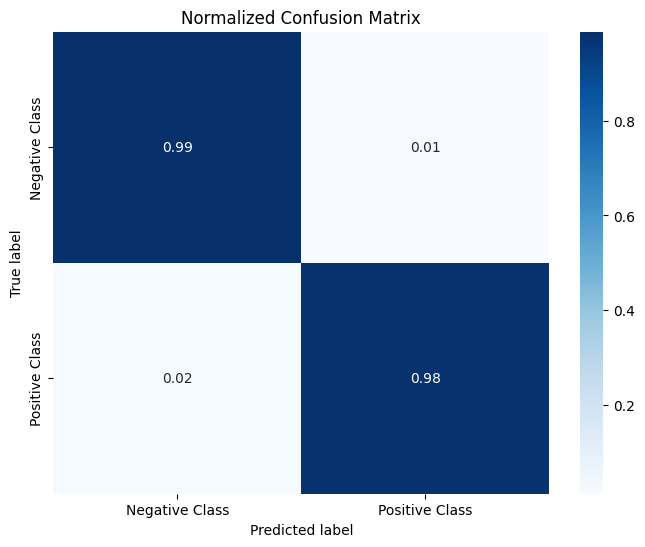

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_binary are defined as in your previous code
labels = ['Negative Class', 'Positive Class']  # Update with your class labels if different

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test[:, 1], y_pred_binary[:, 1])
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()


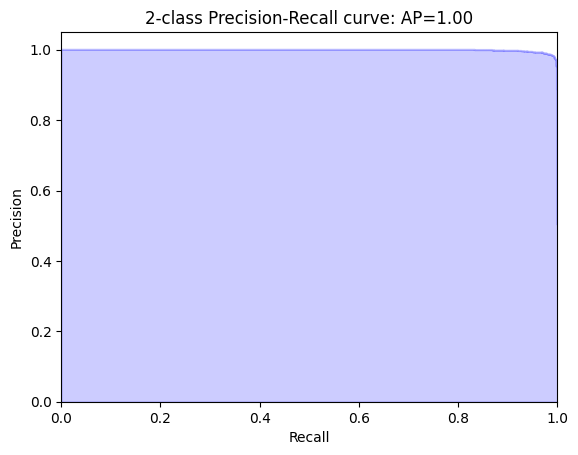

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test[:, 1], y_pred[:, 1])
average_precision = average_precision_score(y_test[:, 1], y_pred[:, 1])

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


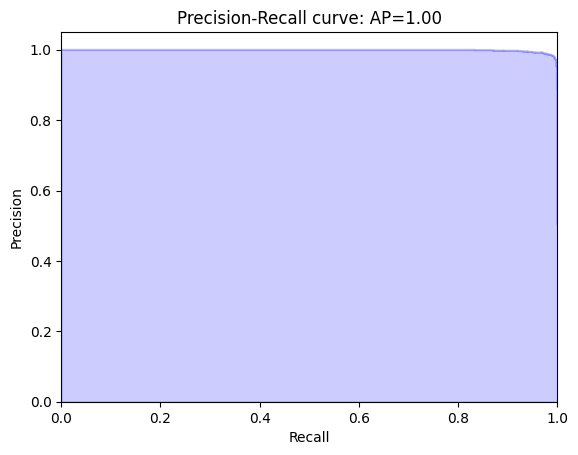

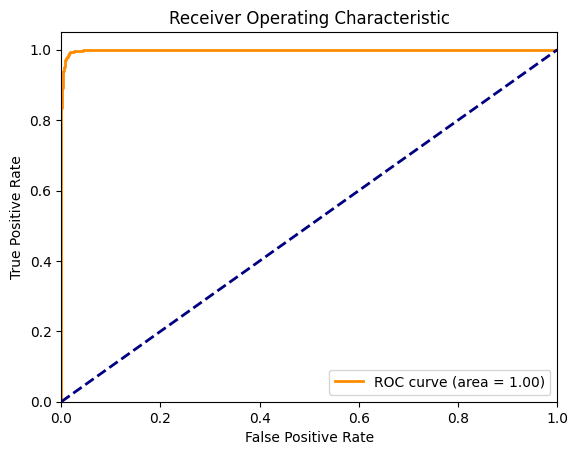

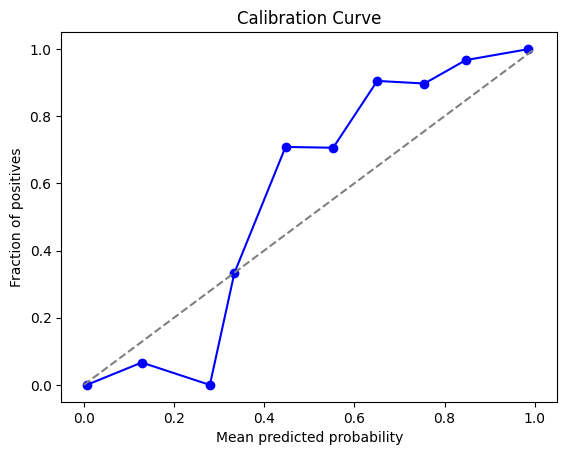

In [49]:












from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve, auc

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test[:, 1], y_pred[:, 1])
average_precision = average_precision_score(y_test[:, 1], y_pred[:, 1])

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test[:, 1], y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()





from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test[:, 1], y_pred[:, 1], n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.show()

